In [34]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Directory you want to retrieve files from
target_directory = '/Users/mxhbmn/Desktop/12. Semester/IM_Challenge/Data/Results_Flexi_MIP'
os.chdir(target_directory)

data_list = []
data = pd.DataFrame(columns = ["cohort", "day", "num_tasks", "profit", "gap", "time", "constraint", "variable"])
for cohort in [7]: 
    for day in [2,5,8,10]: 
        for num_tasks in [50,200,500,1000]: 
        
            endstring = str(cohort) + "_" + str(day) + "_1_" + str(num_tasks) + ".txt"

            with open(file = target_directory+"/solution"+endstring) as file: 
                first_line = [float(item) for item in file.readline().strip().split("\t")]

                if (day == 5) and (num_tasks == 500):
                    profit = 0
                    gap = np.inf
                else: 
                    profit = first_line[0]
                    gap = first_line[1]
                
                if gap == np.inf: 
                    gap = 1
                time = first_line[2]
                constraint = first_line[3]
                variable = first_line[4]

                data_list.append([cohort,day,num_tasks,profit,gap,time,constraint,variable])
                #print(cohort,day,num_tasks,profit,gap,time,constraint,variable)

data = pd.DataFrame(data_list,columns = ["Cohorts", "Day", "Num_Tasks", "Profit", "Gap", "Time", "Constraint", "Variable"])

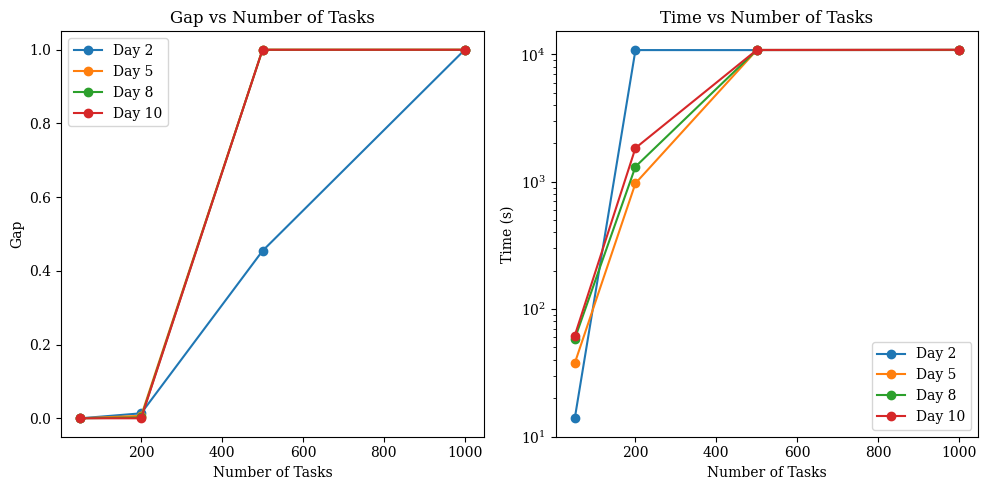

In [57]:

# Unique days for plotting
days = data['Day'].unique()

# Plotting
plt.figure(figsize=(10, 5))

# Set the font to serif
plt.rcParams["font.family"] = "serif"

# Subplot 1: Gap vs Num_Tasks
plt.subplot(1, 2, 1)
for day in days:
    subset = data[data['Day'] == day]
    plt.plot(subset['Num_Tasks'], subset['Gap'], marker='o', label=f'Day {day}')
plt.title('Gap vs Number of Tasks')
plt.xlabel('Number of Tasks')
plt.ylabel('Gap')
plt.legend()

# Subplot 2: Time vs Num_Tasks
plt.subplot(1, 2, 2)
for day in days:
    subset = data[data['Day'] == day]
    plt.plot(subset['Num_Tasks'], subset['Time'], marker='o', label=f'Day {day}')
plt.yscale('log')
plt.title('Time vs Number of Tasks')
plt.xlabel('Number of Tasks')
plt.ylabel('Time (s)')
plt.legend()

# Save the plot as a PNG file
plt.savefig(target_directory +'/results_felxi.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

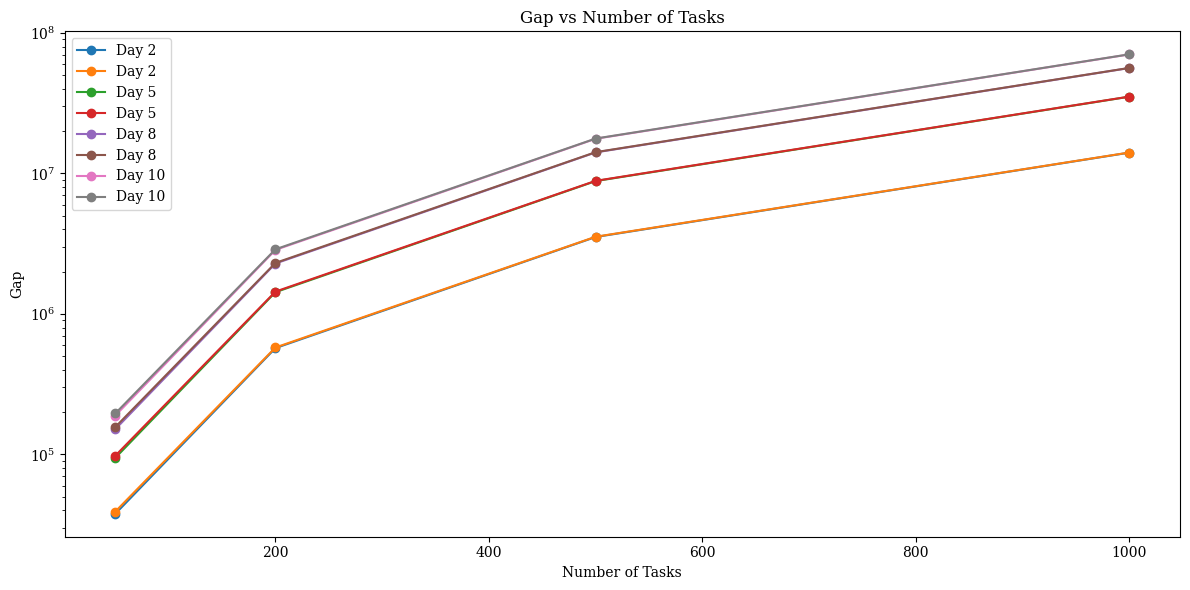

In [55]:

# Unique days for plotting
days = data['Day'].unique()

# Plotting
plt.figure(figsize=(12, 6))

# Set the font to serif
plt.rcParams["font.family"] = "serif"

# Subplot 1: Constraint + Variables vs Num_Tasks
for day in days:
    subset = data[data['Day'] == day]
    plt.plot(subset['Num_Tasks'], subset['Variable'], marker='o', label=f'Day {day}')
    plt.plot(subset['Num_Tasks'], subset['Constraint'], marker='o', label=f'Day {day}')
plt.yscale('log')
plt.title('Gap vs Number of Tasks')
plt.xlabel('Number of Tasks')
plt.ylabel('Gap')
plt.legend()

plt.tight_layout()
plt.show()